In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
location = './Mall_Customers.csv'

In [3]:
# Importing the mall dataset
dataset= pd.read_csv(location)

In [4]:
dataset.shape

(200, 5)

In [5]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#Select the annual income and the spending score columns  
X=dataset.iloc[:, [3, 4]].values

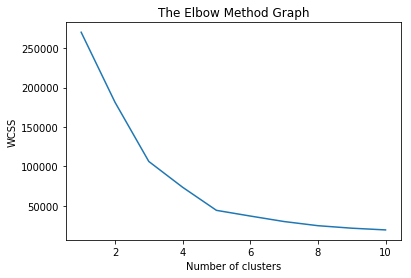

In [7]:
# Using the elbow method to find out the optimal number of clusters. 
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++',max_iter=300,n_init=10,random_state=0 )

     kmeans.fit(X)

     wcss.append(kmeans.inertia_)


plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

According to the Elbow graph we deterrmine the clusters number as 5. 

Applying k-means algorithm to the X dataset. 

In [10]:
kmeans = KMeans(n_clusters=5, init ='k-means++',max_iter=300,n_init=10,random_state=0 )

y_kmeans = kmeans.fit_predict(X)

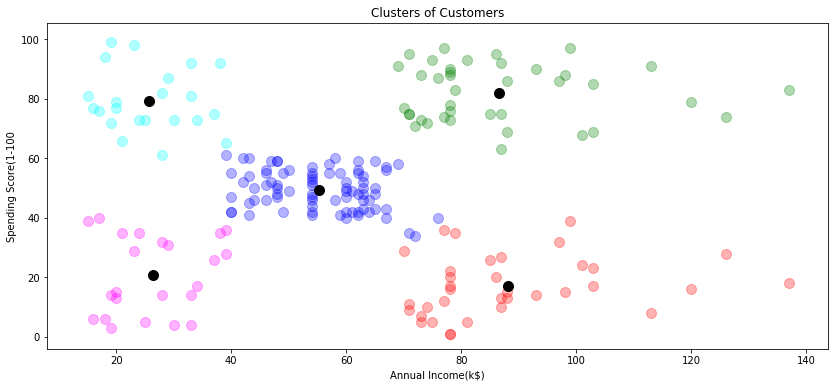

In [27]:
# Visualising the clusters
plt.figure(figsize=(14, 6))

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1', alpha=.3)
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2', alpha=.3)
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3', alpha=.3)
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4', alpha=.3)
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5', alpha=.3)

#Plot the centroid. 

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='k', label ='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100');

## Hierarchical clustering

Using the dendrogram to find the optimal numbers of clusters. 


In [16]:
import scipy.cluster.hierarchy as sch

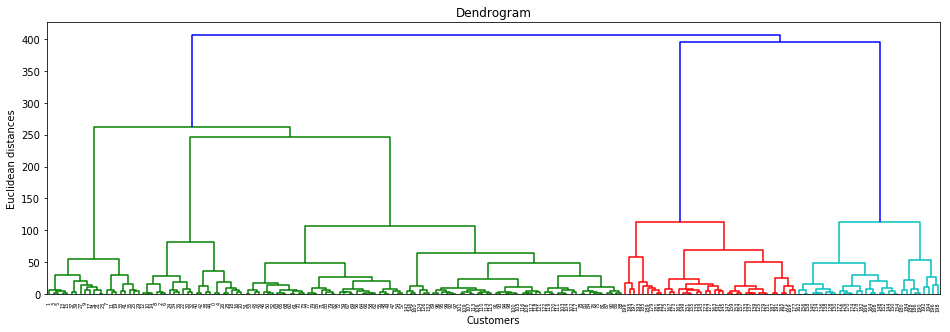

In [20]:
plt.figure(figsize=(16, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances');

## Fitting hierarchical clustering to the Mall_Customes dataset

There are two algorithms for hierarchical clustering: 
- Agglomerative Hierarchical Clustering and 
- Divisive Hierarchical Clustering. 

We choose Euclidean distance and ward method 

In [21]:
from sklearn.cluster import AgglomerativeClustering 

In [22]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

In [23]:
y_hc=hc.fit_predict(X)

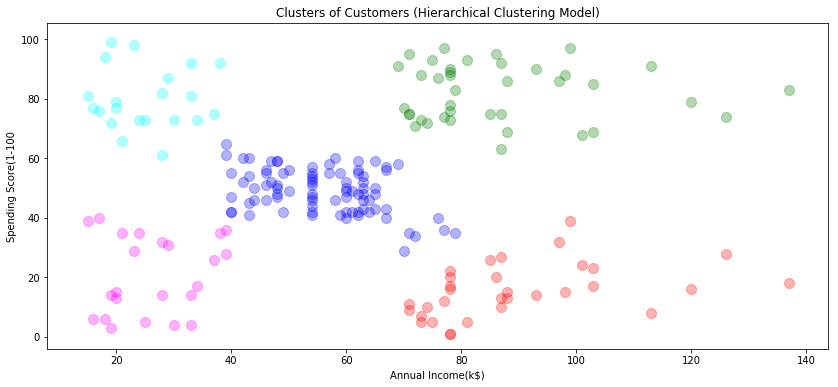

In [30]:
#5 Visualizing the clusters. 
plt.figure(figsize=(14, 6))

plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1', alpha=.3)
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2', alpha=.3)
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3', alpha=.3)
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4', alpha=.3)
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5', alpha=.3)

plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100');